In [1]:
#John David Conley
#Machine Learning
#Assignment 6
#11-15-2022
#https://github.com/DavidConley/machinelearning06

In [2]:
#2) Use CC_GENERAL.csv given in the folder and apply:
#a) Preprocess the data by removing the categorical column and filling the missing values.
#b) Apply StandardScaler() and normalize() functions to scale and normalize raw input data.
#c) Use PCA with K=2 to reduce the input dimensions to two features.
#d) Apply Agglomerative Clustering with k=2,3,4 and 5 on reduced features and visualize
#result for each k value using scatter plot.
#e) Evaluate different variations using Silhouette Scores and Visualize results with a bar chart.

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report, mean_squared_error, accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
#2
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#a
df2 = df.fillna(df.mean()).drop(['CUST_ID'], axis=1)
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
#b
scaler = StandardScaler()
df2_scale = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns, index=df2.index)
df2_scale.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [6]:
#c
pca = PCA(2)
x_pca = pca.fit_transform(df2_scale)
df3 = pd.DataFrame(data=x_pca)
print(df3.head())

          0         1
0 -1.682223 -1.076444
1 -1.138300  2.506493
2  0.969690 -0.383524
3 -0.873631  0.043175
4 -1.599435 -0.688577


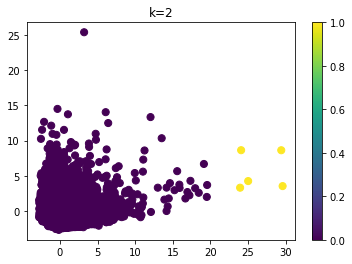

In [7]:
#d
agg2 = AgglomerativeClustering(linkage="complete", affinity="euclidean", n_clusters=2)
model2 = agg2.fit(x_pca)
clusters2 = pd.DataFrame(model2.fit_predict(x_pca))
df3["Cluster"] = clusters2
plot2 = plt.figure(); ax = plot2.add_subplot(111)
scatter2 = ax.scatter(df3[0],df3[1], c=df3["Cluster"],s=50)
ax.set_title("k=2")
plt.colorbar(scatter2); plt.show()

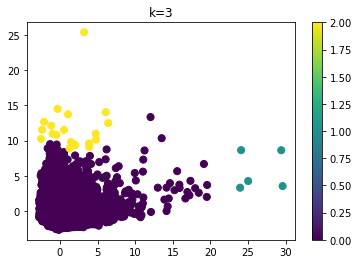

In [8]:
agg3 = AgglomerativeClustering(linkage="complete", affinity="euclidean", n_clusters=3)
model3 = agg3.fit(x_pca)
clusters3 = pd.DataFrame(model3.fit_predict(x_pca))
df3["Cluster"] = clusters3
plot3 = plt.figure(); ax = plot3.add_subplot(111)
scatter3 = ax.scatter(df3[0],df3[1], c=df3["Cluster"],s=50)
ax.set_title("k=3")
plt.colorbar(scatter3); plt.show()

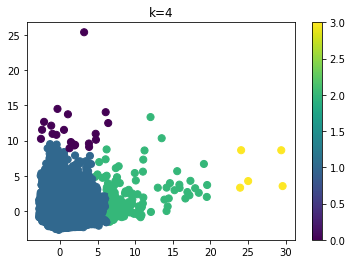

In [9]:
agg4 = AgglomerativeClustering(linkage="complete", affinity="euclidean", n_clusters=4)
model4 = agg4.fit(x_pca)
clusters4 = pd.DataFrame(model4.fit_predict(x_pca))
df3["Cluster"] = clusters4
plot4 = plt.figure(); ax = plot4.add_subplot(111)
scatter4 = ax.scatter(df3[0],df3[1], c=df3["Cluster"],s=50)
ax.set_title("k=4")
plt.colorbar(scatter4); plt.show()

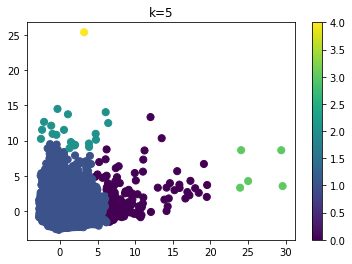

In [10]:
agg5 = AgglomerativeClustering(linkage="complete", affinity="euclidean", n_clusters=5)
model5 = agg5.fit(x_pca)
clusters5 = pd.DataFrame(model5.fit_predict(x_pca))
df3["Cluster"] = clusters5
plot5 = plt.figure(); ax = plot5.add_subplot(111)
scatter5 = ax.scatter(df3[0],df3[1], c=df3["Cluster"],s=50)
ax.set_title("k=5")
plt.colorbar(scatter5); plt.show()

In [11]:
#e
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(x_pca)
y_cluster_kmeans2 = kmeans2.predict(x_pca)
score2 = silhouette_score(x_pca, y_cluster_kmeans2, metric='euclidean')
print(score2)

MemoryError: Unable to allocate 611. MiB for an array with shape (8950, 8950) and data type float64

In [ ]:
plt.hist(score2)

In [ ]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(x_pca)
y_cluster_kmeans3 = kmeans3.predict(x_pca)
score3 = silhouette_score(x_pca, y_cluster_kmeans3, metric='euclidean')
print(score3)

In [ ]:
plt.hist(score3)

In [ ]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(x_pca)
y_cluster_kmeans4 = kmeans4.predict(x_pca)
score4 = silhouette_score(x_pca, y_cluster_kmeans4, metric='euclidean')
print(score4)

In [ ]:
plt.hist(score4)

In [ ]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(x_pca)
y_cluster_kmeans5 = kmeans5.predict(x_pca)
score5 = silhouette_score(x_pca, y_cluster_kmeans5, metric='euclidean')
print(score5)

In [ ]:
plt.hist(score5)